<a href="https://colab.research.google.com/github/jatinm17/cat_vs_dog_Classification/blob/main/cat_vs_dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 129MB/s]
100% 1.06G/1.06G [00:07<00:00, 152MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow  import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
conv_base.trainable=False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img

In [ ]:
batch_size=32
train_datagen=ImageDataGenerator(
    rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-13-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 170s 272ms/step - loss: 0.1931 - accuracy: 0.9190 - val_loss: 0.1910 - val_accuracy: 0.9192
Epoch 2/10
625/625 [==============================] - 156s 249ms/step - loss: 0.1816 - accuracy: 0.9229 - val_loss: 0.1963 - val_accuracy: 0.9158
Epoch 3/10
625/625 [==============================] - 157s 251ms/step - loss: 0.1722 - accuracy: 0.9265 - val_loss: 0.1881 - val_accuracy: 0.9214
Epoch 4/10
625/625 [==============================] - 157s 252ms/step - loss: 0.1670 - accuracy: 0.9298 - val_loss: 0.1921 - val_accuracy: 0.9218
Epoch 5/10
625/625 [==============================] - 166s 265ms/step - loss: 0.1556 - accuracy: 0.9341 - val_loss: 0.2011 - val_accuracy: 0.9192
Epoch 6/10
625/625 [==============================] - 157s 251ms/step - loss: 0.1467 - accuracy: 0.9385 - val_loss: 0.1862 - val_accuracy: 0.9236
Epoch 7/10
625/625 [==============================] - 156s 250ms/step - loss: 0.1493 - accuracy: 0.9377 - val_loss: 0.1845 -

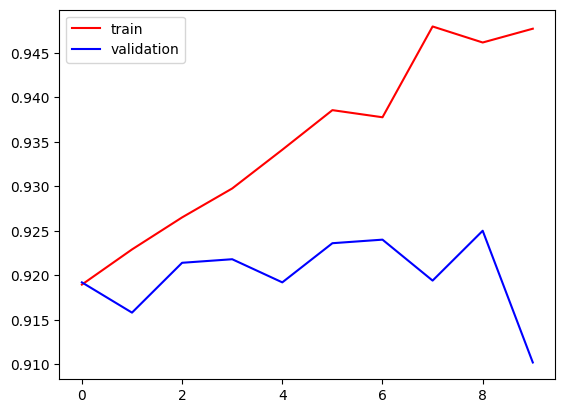

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

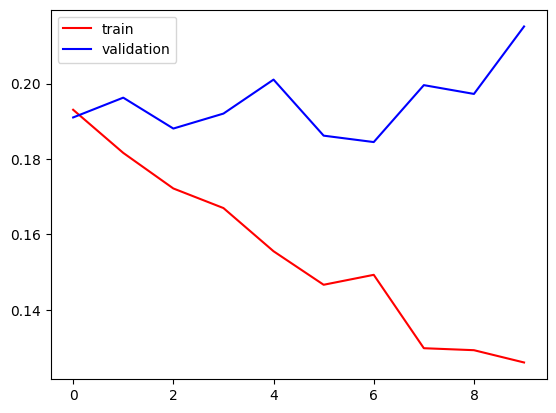

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
test_img=cv2.imread('/content/download.jpeg')

array([[[17, 20, 25],
        [17, 20, 25],
        [18, 21, 26],
        ...,
        [36, 55, 68],
        [37, 56, 69],
        [38, 57, 70]],

       [[17, 20, 25],
        [17, 20, 25],
        [18, 21, 26],
        ...,
        [34, 53, 66],
        [35, 54, 67],
        [35, 54, 67]],

       [[17, 20, 25],
        [17, 20, 25],
        [17, 20, 25],
        ...,
        [33, 50, 63],
        [33, 50, 63],
        [33, 50, 63]],

       ...,

       [[12, 14, 14],
        [12, 14, 14],
        [12, 14, 14],
        ...,
        [21, 25, 30],
        [18, 25, 28],
        [20, 24, 29]],

       [[12, 14, 14],
        [12, 14, 14],
        [12, 14, 14],
        ...,
        [19, 25, 30],
        [19, 25, 30],
        [18, 24, 29]],

       [[12, 14, 14],
        [12, 14, 14],
        [12, 14, 14],
        ...,
        [20, 26, 31],
        [19, 25, 30],
        [18, 24, 29]]], dtype=uint8)
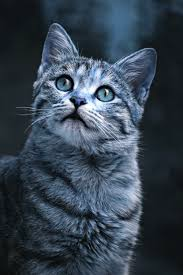

In [ ]:
test_img

In [ ]:
test_img.shape


(275, 183, 3)

In [ ]:
test_img = cv2.resize(test_img,(150,150))

In [ ]:
test_input = test_img.reshape((1,150,150,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)